# INF8111 - Fouille de données / Data Mining
## Automne 2021 - TP3 - Fouille de réseaux sociaux / Mining of social networks
### Membres de l'équipe / Team members
- Slimane Aglagal (2103355) 1
- Colline Blanc (2096695) 2
- Baptiste Pauletto (2096684) 3


## Instructions de remise / Submission
Vous devez remettre dans la boîte de remise sur moodle:

1. ce fichier nommé TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Tout devra être remis avant le **5 décembre 2021 à 23h59**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Partie 1: 10 points

Partie 2: 4 points

Partie 3: 6 points

Pour un total de 20 points.


---

## Submission
You must put back in the submission box on moodle:

1. this file renamed TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **December 5th 2021 à 23h59**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème
Part 1: 10 points

Part 2: 8 points

Part 3: 6 points

For a total of 20 points on 20 points.


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de la vie humaine. Chaque personne appartient tout le long de sa vie à différentes communautés. Avec le rassemblage de ces informations sur les différentes plateformes en ligne de réseaux sociaux, les analystes de données ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec plusieurs impacts sur plusieurs aspects tels que la publicité et les systèmes de recommandation. 

### But
Le but de ce TP est de vous donner un aperçu de l'analyse d'un réseau social.

Dans la première partie, vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Dans la deuxième partie, vous trouverez les personnes avec le plus d'influence dans leur réseau social. 

Pour les deux parties, nous vous fournissons les CSV contenant les réseaux sociaux à analyser.


---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

In the first part, you will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

In the second part, you will find the people with the most influence in their social network.

For both parties, we provide you with all the csv containing the social networks to be analysed.

# 1. LPAm+ (10 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour rassembler les personnes dans des communautés selon les liens entre eux. 

## LPAm+
Dans cette partie, vous implémenterez l'algorithme LPAm+ pour détecter les communautés parmi les personnages de Games of Thrones. Vous devez utiliser les CSV *nodes* et *edges* pour cela. 

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut combiner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'elle peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP. 

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser le package networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

# 1. LPAm+ (10 points)


## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of Games of Thrones. You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [ ]:
# vous pouvez bien sûr utiliser anaconda pour installer les packages
#!pip install --user numpy
#!pip install --user pandas
#!pip install --user matplotlib
#!pip install --user networkx

In [65]:
import numpy as np
import networkx as nx
import copy
import random
import itertools
import math


class LPAmPlus:
    """
    Contructor
    """

    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        self.graph = graph

        """
        Assign a label to each node
        """
        # Récupération du nombre de noeuds du graphe
        list_nodes = list(self.graph.nodes)

        # Assignation d'une étiquette unique à chaque noeud du graphe
        for i, value in enumerate(list_nodes):
          
          # Ajout de l'étiquette (valeur du noeud)
          self.graph.nodes[value]['label'] = i

        """
        labels gives all the communities present in the network
        """
        # Initialisation des étiquettes du graphe
        labels = []
        for i, value in enumerate(list_nodes):
          if self.graph.nodes[value]['label'] not in labels:
            labels.append(self.graph.nodes[value]['label'])

        self.labels = labels
        

    """
    Term to optimize when replacing labels
    """

    def label_evaluation(self, current_node, new_label):
        # Récupération de la matrice B
        B = nx.linalg.modularity_matrix(self.graph)

        # Initialisation pour le calcul
        evaluation = 0
        list_nodes = list(self.graph.nodes)

        # Récupération de l'indice associé au noeud courant (utile pour la partie sur GOT)
        index_current_node = list_nodes.index(current_node)

        # Calcul de l'évalutaion de la valeur de la somme
        for u, value in enumerate(list_nodes):
          if current_node != value and self.graph.nodes[value]['label'] == new_label:
            evaluation += B[index_current_node,u]
        return evaluation

    """
    Function to choose the new label for a node
    """

    def update_label(self, current_node):
        
        # Stockage des données actuelles du noeud courant
        label = label_init = self.graph.nodes[current_node]['label']
        label_value = self.label_evaluation(current_node,label)
        potential_labels = [label]
        max_found = False

        # Calcul pour la potentielle nouvelle étiquette
        for current_label in self.labels:
          current_label_value = self.label_evaluation(current_node, current_label)
          # Si la valeur du nouveau label est strictement supérieure, on l'applique directement
          if current_label_value > label_value :
            label = current_label
            label_value = current_label_value
            max_found = True
          
          # Si elle est égale, on stocke la valeur pour tirer aléatoirement après (entre tous les labels équivalents)
          elif current_label_value == label_value :
            potential_labels.append(current_label)
        
        # Choix aléatoire du nouveau label
        if len(potential_labels) > 1 and not max_found:
          label = random.choice(potential_labels)

        # Mise à jour au sein du graphe
        self.graph.nodes[current_node]['label'] = label
        
        # Retrait de l'étiquette si elle est devenue désuète
        list_nodes = list(self.graph.nodes)
        label_found = False
        for i, value in enumerate(list_nodes):
          if self.graph.nodes[value]['label'] == label_init:
            label_found = True
        if label != label_init and not label_found :
          self.labels.remove(label_init)

    """
    Function that calculates the current modularity of the network
    """
       

    def modularity(self):
        # Récupération de la matrice B
        B = nx.linalg.modularity_matrix(self.graph)

        # Initialisation pour le calcul
        sum = 0
        list_nodes = list(self.graph.nodes)
        nb_edges = nx.number_of_edges(self.graph)

        # Calcul de la modularité selon la première formule
        for u, value_u in enumerate(list_nodes):
          for v, value_v in enumerate(list_nodes):
            if self.graph.nodes[value_u]['label'] == self.graph.nodes[value_v]['label']:
              sum += B[u,v]
        modularity = sum/(2*nb_edges)
        return modularity
    
    
    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self):

      # Initialisation des paramètres de notre algorithme
      # Nombre d'itérations restantes (toute valeur au dessus de 4 fonctionne, valeur déterminée par essai/erreur)
      iterations_left = 4
      # Nombre d'itérations effectivement réalisée sur le graphe courant
      iterations_done = 0

      # Tant que l'on a pas trouvé la modularité maximale (avec un nombre d'itération arbitraire)
      # Ici, on aurait pu réaliser un while true, mais nous pensions que c'était plus propre
      # de limiter le nombre d'itérations
      while iterations_done < iterations_left:

        # Pour chaque noeud de notre graphe
        for node in self.graph.nodes:
            
          # Calcul de la valeur de modularité 
          current_modularity = self.modularity()
            
          # Copie du graphe dans le cas où la nouvelle valeur de modularité serait mois élevée que la précédente
          self.saved_graph = self.graph.copy()
          self.saved_labels = copy.deepcopy(self.labels)
            
          # Mise à jour du label pour le noeud courant
          self.update_label(node)

          # Calcul de la nouvelle valeur de modularité
          updated_modularity = self.modularity()

          # Cas où la modularité s'améliore
          if updated_modularity > current_modularity:
            # Remise à zéro du nombre d'itérations comme un label a changé
            iterations_done = 0

          # Cas où la modularité se maintient
          elif updated_modularity == current_modularity:
            # Incrémentation du nombre d'itérations sur le même graphe étant donné qu'on maintient la modularité
            # Ce cas particulier a pour objectif d'empêcher que l'on boucle à l'infini si on n'améliore pas
            # la modularité après iterations_left passes.
            iterations_done += 1

          # Cas où la modularité diminiue
          elif updated_modularity < current_modularity:
            # Chargement du graphe de l'itération précédente
            self.graph=self.saved_graph
            self.labels = self.saved_labels

    """
    Function that find which communities to combine and combine them
    """
    def merge_communities(self):
        ## Initialisation et sauvegardes 
        self.saved_graph = self.graph.copy()
        self.saved_labels = copy.deepcopy(self.labels)

        # Récupération de la modularité initiale 
        current_modularity = self.modularity()

        # Dictionnaire utilisé pour stocker les fusions possibles et leurs valeurs de modularité associée
        # L'utilisation du dictionnaire nous permet de ne pas refaire plusieurs fois la passe sur nos combinaisons
        dictionary_combinations = {}
        
        # Utilisation de la librairie itertools pour lister toutes les combinaisons possibles de 
        # labels de taille 2 (notre objectif puisqu'on souhaite les fusionner 2 à 2)
        for i, label_combination in enumerate(itertools.combinations(self.labels, 2)):
          
          # Changement d'étiquette pour tous les éléments concernés par le retrait de l'élément de droite de la combinaison
          for node in self.graph.nodes:
            if self.graph.nodes[node]['label'] == label_combination[1]:
              # Attribution du nouveau label
              self.graph.nodes[node]['label'] = label_combination[0]
          
          # Calcul de la nouvelle modularité
          updated_modularity = self.modularity()

          # Stockage des données sous la forme [label_combination] -> modularité
          dictionary_combinations[label_combination] = updated_modularity
        
          # Restauration de l'état initial avant la prochaine itération
          self.graph = self.saved_graph.copy()
          self.labels = copy.deepcopy(self.saved_labels)

        # Récupération de la valeur max dans un dictionnaire après le passage sur toutes les combinaisons
        # Source : (https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary)
        maximum_modularity_keys = max(dictionary_combinations, key=dictionary_combinations.get)

        # Cas où une fusion permet d'améliorer la modularité 
        if dictionary_combinations[maximum_modularity_keys] > current_modularity :
          
          # Affectation de la nouvelle étiquette à tous éléments concernés par le retrait suite à la fusion
          for node in self.graph.nodes:
            if self.graph.nodes[node]['label'] == maximum_modularity_keys[1]:
              # Attribution du nouveau label
              self.graph.nodes[node]['label'] = maximum_modularity_keys[0]

          # Retrait de l'étiquette qui va subir la fusion (garder à jour label)
          self.labels.remove(maximum_modularity_keys[1])

          # Fusion complétée, renvoie vrai
          return True

        # Cas où aucune fusion n'améliore la modularité
        else :
          # Restauration de l'état initial 
          self.graph = self.saved_graph.copy()
          self.labels = copy.deepcopy(self.saved_labels)
          
          # Pas de fusion intéressante, renvoie faux
          return False
    
    
    """
    Function that applies the LPAm+ algorithm on the network
    """

    def find_communities(self):
      # Appel de la fonction permettant d'éxecuter LPAm
      self.LPAm()
      # Tant que des fusions sont possibles, on les réalise
      while self.merge_communities():
        # Ici, on aurait pu relancer une nouvelle exécution de self.LPAm() mais ce n'est pas forcément nécessaire 
        # puisqu'à chaque fusion, l'état de sortie est stable.
        # Nous avons donc choisi de laisser un simple continue pour que l'instruction 
        # while réalise toutes les fusions qu'elle peut avant de retourner !
        continue  

### 1.1 Dataset (0.5 point)

Nous vous avons fourni les CSV pour toutes les saisons de Games of Thrones. Vous devez maintenant représenter ces réseaux en utilisant les deux CSV fournis pour chaque saison: un pour les sommets et un pour les arêtes. 


#### Implémentation
1. Implémentez  la fonction  *`load_unweighted_network`*. Cette fonction retourne le réseau non dirigé et sans poids.

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser le package networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un petit toy dataset. Vous devriez avoir quelque chose de similaire (data/picture.png):
![title](data/picture.png)


---
We have provided you with the csv for all the seasons of Games of Thrones. You must now represent each of those networks in code using two csv for each season: the one for the nodes and the one for the edges.


#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.

To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

Use the function `test_load` to verify your implementation of the function. This test use a toy dataset. You should obtain a result similar to this (data/picture.png):
![title](data/picture.png)


In [10]:
import csv
import pandas as pd
import networkx as nx


def load_unweighted_network(node_csv, edge_csv):
    
    # Création du graphe vide
    network = nx.Graph()
    
    # Lecture des fichiers contenant les données du graphes (noeuds & arcs)
    nodes = pd.read_csv(node_csv)
    edges = pd.read_csv(edge_csv)

    # Chargement des noeuds et des arcs entre les noeuds
    network.add_nodes_from(nodes.Id)
    # Zip permet d'avancer simultanément dans les deux listes pour ajouter à la fois source et destination
    network.add_edges_from(zip(edges.Source, edges.Target))
    
    # On charge les étiquettes (label de vérité) dans la colonne Community (si elle est présente)
    # Effectivement, dans la partie 2 du TP, l'onglet Community n'est plus présent, on ne procède donc pas à cette étape
    if not "Community" in nodes :
        # Partie 2 gérée ici, sans "community"
        return network
    else :
        # Partie 1 gérée ici avec "community"
        for i, node in enumerate(network.nodes):
            network.nodes[node]['Community'] = nodes['Community'][i]
        return network

    

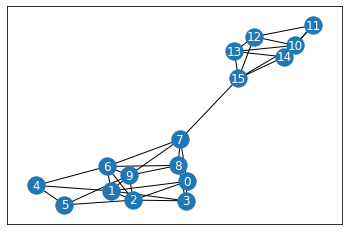

In [11]:
import matplotlib.pyplot as plt
def test_load():
    network = load_unweighted_network("./data/toy-nodes.csv", "./data/toy-edges.csv")
    nx.draw_networkx(network,font_color='white')
    plt.show()

test_load()

### 1.2  Modularité / Modularity (1 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: le nombre d'arêtes
- l: l'étiquette du sommet
- u, v: des sommets dans le réseau
- B: la matrice de modularité où chaque élément vaut $A_{uv} - P_{uv}$
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l_v)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

Elle peut aussi être définie comme: $$Q=\sum_{t=1}^{N_c}\left(\frac{I_t}{m}-\left(\frac{D_t}{2m}\right)^2\right)$$

- m: le nombre d'arêtes
- Nc: le nombre de communautés
- t: une communauté dans le réseau
- $I_t$: le nombre d'arêtes dans la communauté t c'est-à-dire que les deux sommets de l'arête appartiennent à t
- $D_t$: la somme des degrés de tous les sommets appartenant à t

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Prenez la définition présentée que vous voulez. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les nodes agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.413.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

The modularity can also be defined like this: $$Q=\sum_{t=1}^{N_c}\left(\frac{I_t}{m}-\left(\frac{D_t}{2m}\right)^2\right)$$

- m: number of edges
- Nc: the number of community in the graph
- t: a community in the graph
- $I_t$: the number of arc in the community t meaning all arcs that have both nodes in the community t
- $D_t$: the sum of degree of all the nodes in the community t

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `linalg.modularity_matrix` from networkx to calculate B. You can implement whichever definition for the modularity. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.413.

In [12]:
def test_modularity():
    social_network = load_unweighted_network("./data/toy-nodes.csv", "./data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in [0,1,2,3,4,5,6,7,8,9]:
        lpam.graph.nodes[i]['label'] = 0
    for i in [10,11,12,13,14,15]:
        lpam.graph.nodes[i]['label'] = 1
    print("Modularity: {}".format(lpam.modularity()))

test_modularity()

Modularity: 0.41265306122448997


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (1.5 point)

Comme mentionné plus haut, l'algorithme est fortement basé sur son optimisation de la modularité. Il vous est maintenant demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme donne la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction choisit la nouvelle étiquette pour le sommet actuel. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label. 

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et change leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimun de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe dans la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.399 avec 4 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.399 with 4 communities.

In [63]:
def test_lpam():
    social_network = load_unweighted_network("./data/toy-nodes.csv", "./data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

Modularity: 0.39877551020408175
Communities: [3, 5, 8, 11]


### 1.5 LPAm+ (2 point)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va reessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne peut plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction regarde si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.413 et 2 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.413 and 2 communities.

In [68]:
def test_lpam_plus():
    social_network = load_unweighted_network("./data/toy-nodes.csv", "./data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

Modularity: 0.41265306122448997
Communities: [3, 11]


### 1.6 GOT dataset (3 points)

Rouler votre algorithme sur les données de Games of Thrones de chaque saison et comparer ce que vous obtenez et les vraies communautés. Le ground truth se trouve dans la colonne Community des csv. Des liens sont présents entre des personnages lorsque: 
- Personnage A parle directement après Personnage B
- Personnage A parle de Personnage B
- Personnage C parle de Personnage A et Personnage B
- Personnage A et Personnage B font une action ensemble dans une scène (ex: quittent les lieux, A regarde B, sont assis à une table, etc)
- Personnage A et Personnage B apparaissent ensemble dans une scène

Commencez par calculer le ARI (ajusted Rand index) de vos résultats. $$ ARI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: le nombre de sommets
- TP: True positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats et dans le ground truth
- TN: True négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans le ground truth
- FP: False positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans le ground truth
- FN: False négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes alors qu'ils sont dans la même communauté dans le ground truth


**N.B**: Ce n'est pas le nom des communautés que vous avez trouvé qui importante mais leur composition. Autrement dit, un TP est si le sommet a et le sommet b se trouve dans la même communauté dans vos résultats et dans le ground truth.


Répondez aux questions suivantes. Elles servent comme piste de réflexion pour votre analyse.

- L'algorithme performe-t-il bien sur toutes les saisons ou pour certaines seulement? 
- Expliquez pourquoi vous avez obtenu ces résultats en analysant la formation des communautés dans chaque saison. Quelles particularités favorisent des bons résultats? Quelles particularités nuisent à l'algorithme?

Vous pouvez faire les manipulations que vous voulez pour mieux présenter vos résultats et mieux appuyer vos affirmations. 

---

Run your algorithm over the Games of Thrones data from each season and compare what you get and the real communities. The ground truth is found in the Community column in the csv. Links are found between characters A and B when:
- Character A talks directly after Character B
- Character A talks about Character B
- Character C talks about Character B and A
- Character A and Character B does an action together in a scene (ex: leave the room, A looks toward B, are seated together at a table, etc)
- Character A and Character B are both present in a scene

Start by calculating the ARI (adjusted Rand index) of your results. $$ ARI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well on all seasons or for some only? 
- Explain why you obtained those results by analysing the communities from each season. Which particularities offer better results? Which hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

In [19]:
# Comptage du nombre max de communautés différentes pour chaque saison (utile notamment pour des vérifications et coloration des noeuds)
nb_communities = []
for i in range(1,9):

  # Lecture du fichier de la saison courante
  nodes = pd.read_csv(f"./data/got-s{i}-nodes.csv")

  # Initialisation de la liste des communautés
  communities = []

  # Ajout de chaque communauté
  for community in nodes['Community']:
    communities.append(community)

  # Rendre unique chaque communauté dans notre liste
  unique_communities = set(communities)

  # Comptage du nombre de communautés
  nb_communities.append(len(unique_communities))

print(nb_communities)

[7, 7, 9, 9, 6, 9, 4, 5]


 Graphe généré à partir des données de la saison 1 : Vraies communautés


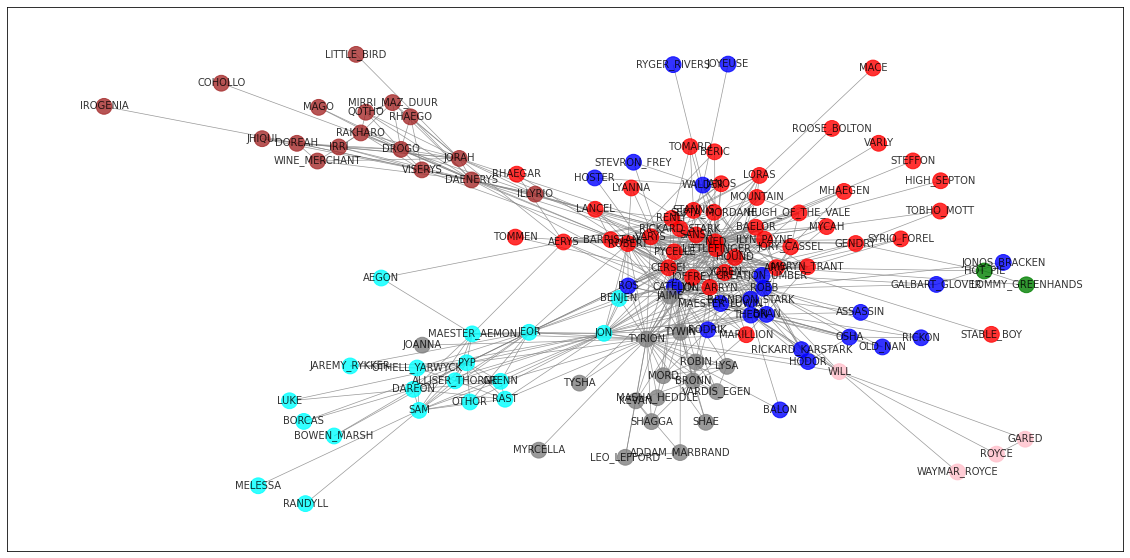

In [ ]:
# Rajout réalisé suite à la sollicitation des enseignants
from sklearn.metrics.cluster import adjusted_rand_score

# Utilisé pour le calcul du temps de prédiction
import time

# On boucle sur chaque saison de GOT disponible (1 à 8)
for season in range(1,9):

  # Récupération du graphe lié à cette saison
  got_social_network = load_unweighted_network(f"./data/got-s{season}-nodes.csv", f"./data/got-s{season}-edges.csv")

  # Récupération de la position des noeuds dans le graphe (pour assurer le même placement 
  # entre les prédictions et la vraie valeur)
  node_positions = nx.spring_layout(got_social_network)

  # Récupération des vraies données liées aux noeuds du graphe (Communauté), 
  # on utilise un set pour rendre les communautés uniques.
  true_communities = list(set(nx.get_node_attributes(got_social_network,'Community').values()))

  # Mapping des true communities vers des valeurs numériques pour calculer l'ARI
  mapping_true_communities = {}
  for i, value in enumerate(true_communities):
    mapping_true_communities[value] = i

  ## Paramétrage de l'affichage du graphe original de la saison courante : 
  # Changement de dimensionnement pour l'affichage du graphe
  fig_true_communitites = plt.figure(figsize=(20,10))

  # Liste des couleurs que peuvent prendre les différentes communautés (récupérées depuis matplotlib)
  colors = ['red','blue','green','pink','gray','cyan','brown','orange','olive']

  # Mapping pour lier communauté et couleurs
  node_colors_true = []
  for node in got_social_network.nodes:
    
    # Récupération de l'index pour la communauté courante
    current_community = got_social_network.nodes[node]['Community']
    index_current_community = true_communities.index(current_community)

    # Rajout de la couleur de la communauté courante dans les couleurs pour le graphe
    node_colors_true.append(colors[index_current_community])

  # Préparation du graphe avec l'ensemble des paramètres pour rendre l'affichage agréable
  nx.draw_networkx(got_social_network, # Noeuds du graphe
                   node_positions, # Position fixée
                   alpha = 0.8, # Facteur de transparence
                   width = 0.7, # Largeur des arcs
                   edge_color = 'gray', # Couleur des arcs
                   font_size = 10, # Taille de la police
                   node_color = node_colors_true, # Couleur des noeuds
                   node_size = 250, # Taille des noeuds
                    font_color = 'black') # Couleur de la police

  # Affichage du graphe avec les vraies communautés
  print(f" Graphe généré à partir des données de la saison {season} : Vraies communautés")
  plt.show()

  # Prédiction pour la saison avec notre algorithme LPAm+
  lpam_got = LPAmPlus(got_social_network)

  # Lancement du chronomètre pour avoir un aperçu de la durée
  begin_time = time.time()
  
  # Prédiction des communautés
  lpam_got.find_communities()

  # Fin du chronomètre et enregistrement du temps d'exécution
  end_time = time.time() - begin_time
    
  # Les communautés préditent sont dans l'attribut 'label' de chaque noeud
  predicted_communities = list(set(nx.get_node_attributes(lpam_got.graph,'label').values()))

  ## Paramétrage de l'affichage du graphe prédit de la saison courante : 
  # On procède exactement au même traitement que précédemment 
  fig_predicted_communitites = plt.figure(figsize=(20,10))

  # Mapping pour lier communauté et couleurs
  node_colors_predicted = []
  for node in lpam_got.graph.nodes:
    
    # Récupération de l'index pour la communauté courante
    current_community = lpam_got.graph.nodes[node]['label']
    index_current_community = predicted_communities.index(current_community)

    # Rajout de la couleur de la communauté courante dans les couleurs pour le graphe
    node_colors_predicted.append(colors[index_current_community])
  
  # Préparation du graphe avec l'ensemble des paramètres pour rendre l'affichage agréable
  nx.draw_networkx(lpam_got.graph, # Noeuds du graphe
                   node_positions, # Position fixée
                   alpha = 0.8, # Facteur de transparence
                   width = 0.7, # Largeur des arcs
                   edge_color = 'gray', # Couleur des arcs
                   font_size = 10, # Taille de la police
                   node_color = node_colors_predicted, # Couleur des noeuds
                   node_size = 250, # Taille des noeuds
                   font_color = 'black') # Couleur de la police

  # Affichage du graphe avec les communautés prédites
  print(f" Graphe généré à partir des données de la saison {season} : Communautés prédites")
  print(f" -- Temps nécessaire pour réaliser la prédiction : {end_time}")
  plt.show()

  ## Calcul des éléments d'analyse :
  # Récupération de toutes les true communities et les prédictions pour l'ARI
  list_nodes_communities = list(nx.get_node_attributes(lpam_got.graph,'Community').values())
  list_nodes_predicted = list(nx.get_node_attributes(lpam_got.graph,'label').values())

  # Passage en numérique des valeurs de true community
  for i,community in enumerate(list_nodes_communities):
    list_nodes_communities[i] = mapping_true_communities[community] 

  # Création de toutes les combinaisons du graphe
  node_combinations = itertools.combinations(lpam_got.graph.nodes,2)

  # Initialisation des compteurs pour le calcul dans la boucle du RI
  true_positive, true_negative, false_positive, false_negative  = 0, 0, 0, 0
  
  # Boucle de calcul pour toutes les combinaisons du graphe (calcul du Random Index)
  for node_combination in node_combinations:
    
    # Récupération des vraies communautés de notre paire de noeuds
    first_node_true = lpam_got.graph.nodes[node_combination[0]]['Community']
    second_node_true = lpam_got.graph.nodes[node_combination[1]]['Community']

    # Récupération des communautés prédites de notre paire de noeuds
    first_node_predicted = lpam_got.graph.nodes[node_combination[0]]['label']
    second_node_predicted = lpam_got.graph.nodes[node_combination[1]]['label']

    # Calcul de nos compteurs étape par étape

    # Si le premier noeud a la même vraie communauté que le deuxième 
    # ET que le premier noeud a la même communauté prédite que le deuxième, 
    # alors on est dans le cas d'un vrai positif
    if (first_node_true == second_node_true) and (first_node_predicted == second_node_predicted) : 
      true_positive += 1

    # Si le premier noeud a une vraie communauté différente du deuxième 
    # ET que le premier noeud a une communauté prédite différente du deuxième, 
    # alors on est dans le cas d'un vrai négatif
    elif (first_node_true != second_node_true) and (first_node_predicted != second_node_predicted) :
      true_negative += 1

    # Si le premier noeud a une vraie communauté différente du deuxième 
    # ET que le premier noeud a la même communauté prédite que le deuxième, 
    # alors on est dans le cas d'un faux positif
    elif (first_node_true != second_node_true) and (first_node_predicted == second_node_predicted) :
      false_positive += 1

    # Si le premier noeud a la même vraie communauté que le deuxième 
    # ET que le premier noeud a une communauté prédite différente du deuxième, 
    # alors on est dans le cas d'un faux négatif
    elif (first_node_true == second_node_true) and (first_node_predicted != second_node_predicted) :
      false_negative += 1

  # Calcul des indicateurs
  # Métrique donnée dans le TP : Random Index (RI)
  RI = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

  # Métrique rajoutée par la suite, ARI :
  ARI = adjusted_rand_score(list_nodes_communities,list_nodes_predicted)

  # Indicateurs habituels dans les tâches de classification
  precision = true_positive / (true_positive + false_positive)
  recall = true_positive / (true_positive + false_negative)

  # Affichage des résultats de la saison courante
  print(f"\nPour la saison {season} de GOT, nous obtenons les informations suivantes :")
  print(f"\n\t- Modularité du graphe : {lpam_got.modularity()}")
  print(f"\n\t- Index aléatoire ajusté (ARI) : {ARI} | Index aléatoire (RI) : {RI}")
  print(f"\n\t- Précision                    : {precision} | Rappel : {recall}")
  print(f"\n\t- Vraies communautés ({len(true_communities)}) : ", true_communities)
  print(f"\n\t- Communautés prédites ({len(predicted_communities)}) : ", predicted_communities)
  print(f"\n\n")

#### Analyse / Analysis

Tout d'abord, pour faciliter notre analyse au sein de cette partie, nous avons fait le choix de procédér à différentes étapes de pré-traitement et de formatage de nos résultats et graphes, dont :  

*   Une coloration de chacune des communautés à partir des données de l'énoncé, soit les communautés originales et de même pour les communautés prédites. Ce petit ajout permet de distinguer visuellement assez rapidement sur les graphes, les communautés présentes. 
*   Un positionnement à l'identique des noeuds entre le graphe original et le graphe prédit. Cet ajout en deux lignes de code permet de simplifier la tâche d'analyse puisque l'on peut comparer les deux résultats plus rapidement grâce à la même position des noeuds et la coloration du point précédent.
*   D'autres modifications de style en tout genre pour faciliter la lisibilité des graphes (alpha de transparence, épaisseur des arcs, couleur de la police, etc...) qui sont détaillées dans les commentaires de la question.
*   Enfin, nous avons fait le choix d'afficher un ensemble d'indicateurs pour chaque saison, dont la modularité, le RI (qui se rapproche de l'accuracy), l'ARI, la précision, le rappel et le nombre de communautés qui vont alors nous permettre de mener à bien notre analyse.

Une fois la forme correctement mise en place, on peut s'attarder sur l'analyse du fond de cette question.

Tout d'abord, concernant la performance de l'algorithme sur ce jeu de données, en basant notre analyse sur le RI et la modularité, on peut déceler plusieurs comportements différents :    

*    Premièrement, là où notre algorithme LPAm+ fonctionne le moins bien, la saison 8 de Game of Thrones. Effectivement, même s'il parvient à déterminer correctement le nombre de communautés, ces dernières ne correspondent pas aux véritables communautés entre les personnages. 

  Le RI étant utilisée pour évaluer l'efficacité de notre prédiction, sa valeur laisse transparaître ces mauvais résultats (**0.53**). En effet, si on observe la valeur du rappel pour ce cas précis, on remarque qu'il est particulièrement bas (**0.30**), signifiant alors un nombre important de faux négatifs (cas où deux personnages sont effectivement dans la même communauté mais que notre algorithme classe comme dans deux communautés différentes), donc, de mauvaises prédictions. 

  Plusieurs facteurs peuvent être à l'origine de cette situation, dont la forte proportion de liens entre des noeuds de communautés différentes et inversement, une faible densité de liens entre noeuds d'une même communauté. On peut confirmer cette hypothèse en s'attardant sur la modularité qui est la plus basse de tout notre jeu de données (**0.20**) et qui témoigne alors de la difficulté de notre algorithme à déterminer efficacement les membres d'une communauté donnée. En se penchant sur la représentation graphique de cette saison, on comprend bien le phénomène avec tous les personnages de communautés diverses regroupés autour d'un seul et même petit groupe de personnages. On distingue alors ici une particularité qui nuit à l'efficacité de l'algorithme LPAm+.

*   A l'exception de cette saison, si l'on se fie au RI, toutes les autres obtiennent des résultats bien plus intéressants allant de **0.85** à **0.98** prouvant alors une certaine pertinence de l'algorithme LPAm+. En effet, on peut distinguer deux sous groupes de données pour les étudier plus en détail, le groupe *7,1,3* avec un ARI oscillant entre **0.85** et **0.94** et le groupe *2,5,6,4* avec un RI oscillant entre **0.95** et **0.98**.

*  Pour le groupe des saisons *7, 1 et 3*, les performances obtenues sont donc respectivement, **0.85**, **0.90** et **0.94**, ce qui est tout à fait satisfaisant dans l'ensemble. Cependant, on remarque une phénomène assez intéressant qui est l'incapacité pour ces trois graphes de trouver un équilibre entre faux positifs et faux négatifs (ce phénomène se retrouve également dans le graphe 4 mais les performances obtenues sont légèrement meilleures). Effectivement, les valeurs de rappel et de précision sont toujours plus accentuées pour l'un des deux mais n'atteignent jamais un équilibre. Nous pensons que ceci peut s'expliquer par la topologie du graphe puisque l'on a de fortes concentrations de personnages de communautés différentes au centre avec une périphérie plus sporadique, complexifiant alors la détermination des communautés. Cette hypothèse peut se voir confirmer par la modularité, oscillant entre **0.31** pour la saison 7 et **0.62** pour la saison 3.
  
  Il est d'ailleurs intéressant de noter les bonnes performances sur la saison 3 alors que le nombre de communautés a été grandement réduit par rapport à la réalité (9 -> 6). Cela traduit de nombreux liens entre communautés, qui selon LPAm+ méritait alors, d'être regroupées.
  
  

* Enfin, le groupe de saison qui performe le mieux (>95.0%), les saisons *4,6,2 et 5* avec des scores respectifs de **0.95**, **0.95**, **0.96** et **0.98** est également celui qui possède les modularités les plus élevées (**0.56** à **0.67**). Nous pensons qu'il s'agit là d'un facteur explicatif de ces performances si satisfaisantes. En effet, si l'on s'en réfère à la définition de la modularité, cette valeur élevée signifie que les membres d'une même communauté ont établi beacoup de liens entre eux et relativement peu avec les autres communautés. C'est également une particularité de graphe qui permet un bon fonctionnement de LPAm+. Grâce à l'interprétation graphique de ces 4 saisons, nous sommes capables de discerner à l'oeil ce comportement. Finalement, ce sont les seules saisons (à l'exception de la 4), qui parviennent à maintenir un équilibre entre rappel et précision, témoignant alors d'une prédiction pertinente.

Si l'on prend du recul, on peut noter la pertinence de l'utilisation de LPAm+ puisqu'il parvient toujours à déterminer les cas simples (par exemple, des ensembles de noeuds séparés du reste) tout en se rapprochant particulièrement bien de la réalité pour des cas plus complexes (en terme de communautés trouvées) juste en se basant sur un calcul de modularité. Ceci fait de lui un algorithme idéal pour une première approche de l'étude de graphe.

**Ajout post 18/11 (demande d'utilisation de ARI de sklearn) :**     
Cette métrique conserve le même ordre que la RI précédemment utilisée pour notre analyse et propose une valeur plus réaliste de nos prédictions par rapport à l'aléatoire. En effet, les cas les plus performants obtiennent un score élevé et on remarque une meilleure pénalisation pour les mauvais résultats de la saison 8. A l'avenir, il serait donc préférable de privilégier cette dernière dans d'autres analyses, d'autant plus qu'elle est implémentée au sein de la librairie sklearn, nous permettant alors de réutiliser plutôt que de reproduire à nouveau.






# 2. Personnages influents dans GOT / Influent character in GOT (4 points)

##  Analyse d'un réseau social 
Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau soit les personnes autour desquelles les gens du réseau se regroupent.

Il existe des mesures qui permettent de connaître ces personnes: les mesures de centralité. **Vous devez implémenter les mesures vous-même et ne pas utilisez les implémentations de networks de ces mesures.** Pour vous aider lors de l'implémentation de ses mesures, un deuxième toy dataset vous est fourni. Il ressemble à ceci (data/picture2.png):
![title](data/picture2.png)

## GOT datasets
La série Games of Thrones est reconnue pour tuer ses personnages importants. Nous vous demandons de vérifier cette affirmation. Pour cette partie, vous devez utiliser tous les CSV donnés avec le TP (nodes, edges et deaths). Nous voulons que vous trouviez les personnages les plus influents de chaque saison et que vous les compariez avec la liste de personnages morts durant la saison.

---

##  Social network analysis

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use Networks implementation for the  tp.** To help you during the implementation of those measurements, a second toy dataset is provided to you. It looks like this (data/picture2.png): ![title](data/picture2.png)

## GOT datasets
The Games of Thrones series is known to kill its important characters. We ask you to verify this statement. For this part, you must use all the csv given with the TP (nodes, edges and deaths). We want you to find the most influential characters from each season and compare them with the list of dead characters during the season.


## 2.1 Centralité de degré / Degree centrality (0.5 point)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_degree_centrality` pour vérifier votre implémentation. Le sommet 1 devrait avoir la plus haute mesure de 0.4375.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.

Use the function `test_degree_centrality` to verify your implementation. The best node should be node_1 with 0.4375.

In [11]:
def calculate_degree_centrality(social_network):
  #Initialisation des paramètres pour le calcul
  #Centralité de degré
  degree_centrality = 0
  #Nombre d'arretes attachées à chaque sommet
  degree_of_node=0
  #Nombre de nodes dans le network
  nb_nodes = nx.number_of_nodes(social_network)

  #Calcul de la centralité de degré
  for node in social_network.nodes:
    #nombre d'arretes attachées au node
    degree_of_node=len(social_network.edges(node))
    #calcul selon la formule décrite dans l'énoncé
    degree_centrality=degree_of_node/(nb_nodes-1)
    #Ajout de la mesure au sommet y afférent
    social_network.nodes[node]['degree_centrality']=degree_centrality

In [12]:
def test_degree_centrality():
    social_network = load_unweighted_network("./data/toy-nodes2.csv", "./data/toy-edges2.csv")
    calculate_degree_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'degree_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest degree centrality node: {} with {}".format(best_node, dict_centrality[best_node]))
test_degree_centrality()

Highest degree centrality node: node_1 with 0.4375


## 2.2 Centralité de proximité / Closeness centrality (0.5 point)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

Utilisez la fonction `test_closeness_centrality` pour vérifier votre implémentation. Le sommet 3 devrait avoir la plus haute mesure de 0.41.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

Use the function `test_closeness_centrality` to verify your implementation. The best node should be node_3 with 0.41.

In [13]:
def calculate_closeness_centrality(social_network):
  #Initialisation des paramètres pour le calcul
  #Centralité de proximité
  closeness_centrality = 0
  #Moyenne des distances les plus courtes d'un node source vers tous les nodes de network
  av_dist=0
  #Nombre de nodes dans le network
  nb_nodes = nx.number_of_nodes(social_network)

  #Calcul de la centralité de proximité pour chaque node
  for node_source in social_network.nodes:
    #On initialise la somme des distances à 0 pour chaque node
    sum_distance=0
    #On explore tous les nodes dans le network 
    for node_target in social_network.nodes:
      #On evite de calculer la distance de meme node
      if node_source!=node_target:
        #On fait la somme des distances courtes vers tous les nodes. On soustrait "1" car le court chemin contient le node source et le node cible
        try:sum_distance+=len(nx.shortest_path(social_network,source=node_source,target=node_target))-1
        except: continue
    #Moyenne des distances courtes
    av_dist=sum_distance/(nb_nodes-1)
    #Valeur de la centralité de proximité de node source
    closeness_centrality=1/av_dist
    #Ajout de la mesure au node source y affèrent
    social_network.nodes[node_source]['closeness_centrality']=closeness_centrality

In [14]:
def test_closeness_centrality():
    social_network = load_unweighted_network("data/toy-nodes2.csv", "data/toy-edges2.csv")
    calculate_closeness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'closeness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest closeness centrality node: {} with {}".format(best_node, dict_centrality[best_node]))

test_closeness_centrality()

Highest closeness centrality node: node_3 with 0.41025641025641024


## 2.3 Centralité d'intermédiarité / Betweeness centrality (1 point)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: le nombre de chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i 

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_betweennes_centrality` pour vérifier votre implémentation. Le sommet 4 devrait avoir la plus haute mesure de 0.57.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the  number of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

Use the function `test_betweennes_centrality` to verify your implementation. The best node should be the node_4 with 0.57.


In [15]:
import scipy.special

def calculate_betweenness_centrality(social_network):
  #Initialisation des paramètres pour le calcul
  #Nombre de nodes dans le network
  nb_nodes = nx.number_of_nodes(social_network)
  #binomial coefficient
  binomial_coefficient=scipy.special.binom(nb_nodes,2)

  #Calcul de la centralité d'intermédiarité
  for node_i in social_network.nodes:
    #Centralité d'intermédiarité
    betweenness_centrality = 0
    #Nombre de chemnins les plus courts entre les nodes j et k et passant par i
    nb_shortest_path_jik=0
    for node_j in social_network.nodes:
      #On exclut le node i
      if node_j!=node_i:
        for node_k in social_network.nodes:
          #On exclut le node i et on verifie que le node k>j
          if node_k!=node_i and node_k>node_j:
            #Tous les plus courts chemins entre les nodes j et k
            try:
              all_shortest_path=[p for p in nx.all_shortest_paths(social_network,source=node_j,target=node_k)]
              for path in all_shortest_path :
                #Si un plus court chemin passe par le node i, on incrémente le paramétre nb_shortest_path_jik
                if node_i in path :
                  nb_shortest_path_jik+=1
            except: continue
    #On fait le calcul de centralité selon la formule de l'énoncé
    betweenness_centrality=nb_shortest_path_jik/binomial_coefficient
    #Ajout de la mesure au node y afférent
    social_network.nodes[node_i]['betweenness_centrality']=betweenness_centrality


In [16]:
def test_betweenness_centrality():
    social_network = load_unweighted_network("data/toy-nodes2.csv", "data/toy-edges2.csv")
    calculate_betweenness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'betweenness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest betweenness centrality node: {} with {}".format(best_node, dict_centrality[best_node]))

test_betweenness_centrality()

Highest betweenness centrality node: node_4 with 0.5735294117647058


## 2.4 Analyse de vos résultats / Analysis of your results (2 points)

Executez les trois fonctions sur les réseaux de chaque saison et présentez le top 10 pour chaque mesure. **Pour les saisons 2, 4 et 6 ne calculez pas la centralité de proximité**, car ce sont des graphes déconnectés. Pour chaque saison, comparez le top 10 des mesures avec la liste de morts de la saison disponible dans les csv death. Répondez aux questions suivantes. Elles sont des pistes de réflexions pour votre analyse.

- Est-ce que le top 10 est suffisant pour trouver les morts importants de chaque saison? 
- Quelle mesure semble mieux prédire les morts? 
- Est-ce que la réputation de Games of Thrones de tuer plusieurs de ses personnages importants est fondée?

**N.B.:** Si vous ne connaissez pas la série et vous n'êtes pas sûrs quels morts peuvent être considérés importants, faites une recherche Google sur les personnages importants. Mentionnez votre démarche et la conclusion de vos recherches. Il n'y a pas une liste précise de morts importants. Évidemment si vous me dite que Daenerys n'est pas importante, je vais douter de vos recherches. Le but est de voir votre travail de réflexion et d'analyse des mesures de centralité. 

---

Run the three functions on the networks of each season and present the top 10 for each metric. **For season 2, 4 and 6 do not calculate the proximity centrality** because they are disconnected graph. For each season, compare the top 10 metrics with the season's death list in the death csv. Answer the following questions. They are guide for your analysis.

- Is the top 10 enough to find the significant deaths of each season? 
- What measure seems to better predict the dead? 
- Is the reputation of Games of Thrones for killing many important characters founded?

**N.B:** If you don't know the series and aren't sure which deaths are considered important, do a Google research on the important characters in the series. Metion your research and the conclusion of it. There isn't a precise list of important deaths but if you tell me that Daenerys isn't important, I will doubt of the seriousness of your research. The goal is to see how your analyse the results giving by centrality metrics.

### Résultats / Results

In [17]:
#Lecture des données de chaque saison
#On va stocker les données dans un dictionnaire
dictionary={}
for season in range(1,9):
  dictionary["network_season{0}".format(season)] = load_unweighted_network("./data/got-s{0}-nodes.csv".format(season), "./data/got-s{0}-edges.csv".format(season))
  dictionary["deaths_season{0}".format(season)]=pd.read_csv("./data/got-s{0}-deaths.csv".format(season))
  #ID des morts par saison
  list_ids=[]
  for j in range(len(dictionary["deaths_season{0}".format(season)].Id)):
    list_ids.append(dictionary["deaths_season{0}".format(season)].Id[j])
  dictionary["deaths_season{0}_id".format(season)]=list_ids

In [18]:
#Calcul des mesures pour les networks des seasons

for season in range(1,9):
  #On ne calcule pas la centralité de proximité pour les seasons 2,4 et 6
  if season in [2,4,6]:
    #Calcul de centralité de degré
    calculate_degree_centrality(dictionary["network_season{0}".format(season)])
    #Calcul de la centralité d'intermédiarité
    calculate_betweenness_centrality(dictionary["network_season{0}".format(season)])
  else:
    #Calcul de centralité de degré
    calculate_degree_centrality(dictionary["network_season{0}".format(season)])
    #Calcul de centralité de proximité
    calculate_closeness_centrality(dictionary["network_season{0}".format(season)])
    #Calcul de la centralité d'intermédiarité
    calculate_betweenness_centrality(dictionary["network_season{0}".format(season)])

In [20]:
# Affichage des TOP10 pour chaque mesure
from prettytable import PrettyTable

top_centrality={}
top_closeness={}
top_betweenness={}

taux_morts_centrality={}
taux_morts_closeness={}
taux_morts_betweenness={}

#On récupère les TOP10 pour chaque mesure
for season in range(1,9):
  network="network_season{0}".format(season)
  if season in [2,4,6]:
    dict_centrality = nx.get_node_attributes(dictionary[network], 'degree_centrality')
    top1=sorted(dict_centrality, key=dict_centrality.get, reverse=True)[0:10]
    top_centrality["season {0}".format(season)]=top1
    #Calcul de taux de morts dans les TOP10
    list1_as_set = set(top1)
    intersection = list1_as_set.intersection(dictionary["deaths_season{0}_id".format(season)])
    intersection_as_list = list(intersection)
    taux_morts_centrality["season{0}".format(season)]=len(intersection_as_list)

    dict_betweenness = nx.get_node_attributes(dictionary[network], 'betweenness_centrality')
    top3=sorted(dict_betweenness, key=dict_betweenness.get, reverse=True)[0:10]
    top_betweenness["season {0}".format(season)]=top3
    #Calcul de taux de morts dans les TOP10
    list1_as_set = set(top3)
    intersection = list1_as_set.intersection(dictionary["deaths_season{0}_id".format(season)])
    intersection_as_list = list(intersection)
    taux_morts_betweenness["season{0}".format(season)]=len(intersection_as_list)

  else:
    dict_centrality = nx.get_node_attributes(dictionary[network], 'degree_centrality')
    top1=sorted(dict_centrality, key=dict_centrality.get, reverse=True)[0:10]
    top_centrality["season {0}".format(season)]=top1
    #Calcul de taux de morts dans les TOP10
    list1_as_set = set(top1)
    intersection = list1_as_set.intersection(dictionary["deaths_season{0}_id".format(season)])
    intersection_as_list = list(intersection)
    taux_morts_centrality["season{0}".format(season)]=len(intersection_as_list)

    dict_closeness = nx.get_node_attributes(dictionary[network], 'closeness_centrality')
    top2=sorted(dict_closeness, key=dict_closeness.get, reverse=True)[0:10]
    top_closeness["season {0}".format(season)]=top2
    #Calcul de taux de morts dans les TOP10
    list1_as_set = set(top2)
    intersection = list1_as_set.intersection(dictionary["deaths_season{0}_id".format(season)])
    intersection_as_list = list(intersection)
    taux_morts_closeness["season{0}".format(season)]=len(intersection_as_list)

    dict_betweenness = nx.get_node_attributes(dictionary[network], 'betweenness_centrality')
    top3=sorted(dict_betweenness, key=dict_betweenness.get, reverse=True)[0:10]
    top_betweenness["season {0}".format(season)]=top3
    #Calcul de taux de morts dans les TOP10
    list1_as_set = set(top3)
    intersection = list1_as_set.intersection(dictionary["deaths_season{0}_id".format(season)])
    intersection_as_list = list(intersection)
    taux_morts_betweenness["season{0}".format(season)]=len(intersection_as_list)

#Affichage des tableaux
table1 = PrettyTable()
table2 = PrettyTable()
table3 = PrettyTable()

table1.add_column("TOP10", [1,2,3,4,5,6,7,8,9,10])
table2.add_column("TOP10", [1,2,3,4,5,6,7,8,9,10])
table3.add_column("TOP10", [1,2,3,4,5,6,7,8,9,10])

for key,val in top_centrality.items():
  table1.add_column(key, val)
for key,val in top_closeness.items():
  table2.add_column(key, val)
for key,val in top_betweenness.items():
  table3.add_column(key, val)

#Affichage des TOP10 pour les trois mesures
print("Top10 selon la mesure de la Centralité de degré:")
print(table1)
print("Top10 selon la mesure de la Centralité de proximité (Pour les saisons 2, 4 et 6 on n'a pas la centralité de proximité):")
print(table2)
print("Top10 selon la mesure de la Centralité d'intermédiarité:")
print(table3)

Top10 selon la mesure de la Centralité de degré:
+-------+--------------+--------------+--------------+----------+--------------+----------+----------+-----------+
| TOP10 |   season 1   |   season 2   |   season 3   | season 4 |   season 5   | season 6 | season 7 |  season 8 |
+-------+--------------+--------------+--------------+----------+--------------+----------+----------+-----------+
|   1   |     NED      |   JOFFREY    |     ROBB     | JOFFREY  |    CERSEI    |  SANSA   |   JON    |    SAM    |
|   2   |    TYRION    |    TYRION    |    TYWIN     |  TYRION  |     JON      |   JON    | DAENERYS |  DAENERYS |
|   3   |   CATELYN    |    CERSEI    |    TYRION    |  CERSEI  | LITTLEFINGER |  CERSEI  |  TYRION  |   TYRION  |
|   4   |    ROBERT    |     ROBB     |   CATELYN    |   JON    |   STANNIS    |  TYRION  |  CERSEI  |   SANSA   |
|   5   |     ROBB     |     ARYA     |   JOFFREY    |  SANSA   |    SANSA     |  JAIME   |  DAVOS   |    ARYA   |
|   6   |    CERSEI    |    TYW

In [22]:
#Affichage des taux de morts réels par saison et selon une des trois mesures 
from tabulate import tabulate
centrality=["Centralité de degré"]
betweenness=["Centralité d'intermédiarité"]
closeness=["Centralité de proximité"]
Titles=["Mesure","Saison 1","Saison 2","Saison 3","Saison 4","Saison 5","Saison 6","Saison 7","Saison 8"]

for season in range(1,9):
  centrality.append(taux_morts_centrality["season{0}".format(season)])
  betweenness.append(taux_morts_betweenness["season{0}".format(season)])
  try:
    closeness.append(taux_morts_closeness["season{0}".format(season)])
  except:
    closeness.append("NA")

table = [centrality,closeness,betweenness]
print(tabulate(table,headers=Titles, tablefmt="presto",numalign="center"))

 Mesure                      |  Saison 1  | Saison 2   |  Saison 3  | Saison 4   |  Saison 5  | Saison 6   |  Saison 7  |  Saison 8
-----------------------------+------------+------------+------------+------------+------------+------------+------------+------------
 Centralité de degré         |     2      | 0          |     2      | 3          |     2      | 1          |     0      |     1
 Centralité de proximité     |     2      | NA         |     2      | NA         |     1      | NA         |     0      |     1
 Centralité d'intermédiarité |     2      | 0          |     2      | 1          |     2      | 1          |     0      |     3


### Analyse / Analysis

Le tableau ci-dessous nous montre clairement que les TOP10 des personnalités de Game Of Thrones, selon les trois mesures, n'est pas suffisant pour trouver les morts importants de chaque saison de la série. Les centralité de degré et d'intermédiarité semblent être les meilleures mesures parmis les trois. Pour la saison 4, la centralité de degré est élevée pour trois personnalités (JOFFREY,OBERYN et TYWIN) qui ont été tuées pendant cette saison.
La réputation de Games of Thrones de tuer plusieurs de ses personnages importants n'est pas très bien fondée pour toutes les saisons. Si on prend la saison 7, tous les TOP10 selon les trois mesures que nous avons calculé ci-haut, n'ont pas été tués pendant cette saison. Cela ne met pas en doute l'importance de ces mesures mais nous pouvons l'expliquer par le caractère des réalisateurs de cette série, qui créaient de suspense et évitaient à ce que les spectateurs arrivent à prédire la suite des événements.

# 3. DeepWalk (6 points)

##  Prédiction de lien 
Une autre analyse intéressante à faire avec un réseau social est la prédiction de liens. En regardant les liens actuels, il est possible de déterminer la probabilité qu'un lien apparaisse entre deux personnes dans le réseau. Pour ce TP, on vous demande d'implémenter le modèle de DeepWalk pour transformer les informations contenues dans le réseau et utiliser les **embeddings** pour prédire des liens.

## DeepWalk
Le modèle de DeepWalk est basé sur l'idée de traiter un réseau social comme un texte. On peut ainsi utiliser des techniques d'apprentissage machine pour du traitement de language. C'est un modèle en deux étapes. La première étape est de contruire le "dictionnaire" du réseau en explorant le voisinage de chaque sommet. La deuxième étape applique l'algorithme SkipGram sur le "dictionnaire" pour apprendre les *embeddings* pertinents. Le réseau est maintenant transformé et prêt à être traité par des techniques de NLP.

## GOT datasets
Nous vous demandons de choisir une saison de GoT excluant les **saisons 2, 4 et 6** pour tester votre implémentation du modèle. Enlever un lien fort, un lien moyen et un lien faible d'un sommet du réseau. Nous voulons voir si le modèle est capable de retourver ces 3 liens pour le sommet.

---
##  Link prediction
Another interesting graph manipulation is link prediction. By looking at current links between nodes, the probability of connecting two nodes can be predicted. In this part of the TP, we want you to implement the DeepWalk model to transform the information in the graph to be used with NLP models to predict links.

## DeepWalk
The DeepWalk model is based on the idea that social network can be treated like a text. As such, NLP techniques can be used to mine a social network. It is a 2 step model. The first step builds the network's dictionnary by exploring the network. The second step use the SkipGram algorithm to transform the dictionnary in embeddings. The network is then ready to be used by NLP techniques.

## GOT datasets
We ask you to choose a GOT season excluding **season 2, 4 and 6** to test your implementation. Remove a strong, medium and low link from one node. We want to see if the model can find those links again.



In [53]:
import random as rnd
import numpy as np
import pandas as pd
import networkx as nx
import math


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


class DeepWalk:
    def __init__(self, graph):
        self.graph = graph

        self.random_walks = []
        self.walk_length = None
        self.n_walk = None

        self.node_index = None
        self.training_data = None

        self.n_neurons = None
        self.epochs = None
        self.embeddings = None
        self.W1 = None
        self.loss = 0
        self.alpha = 0.00001
        self.init = None

    def random_walk(self, start_node):
        #On crée notre marche aléatoire pour notre noeud de départ 
        start_node_random_walk = [start_node]
        current_node = start_node
        #On itère sur le nombre de noeuds que l'on veut dans notre marche
        for i in range(self.walk_length):
            #On récupère les voisins de notre noeud courrant 
            neighbors = list(self.graph.neighbors(current_node))
            if len(neighbors) > 0:
                #On choisit un nouveau noeud aléatoire dans nos noeuds courants
                current_node = random.choice(neighbors)
            #On ajoute notre noeud dans notre marche aléatoire
            start_node_random_walk.append(current_node)
        return start_node_random_walk
    

    def build_random_walks_matrix(self, n_walk, walk_length):
        self.n_walk = n_walk
        self.walk_length = walk_length
        random_walks_matrix = []
        #On crée n_walk marches aléatoires 
        for i in range(self.n_walk):
            random_walks_list = []
            #on veut beaucoup d'aléatoire pour chaque marche, on mélange donc l'odre des noeuds sur lesquels on itère
            node_list = list(self.graph.nodes)
            random.shuffle(node_list)
            for node in node_list:
                #pour chaque noeud on ajoute à la liste une marche aléatoire qui commence par ce noeud
                random_walks_list.append(self.random_walk(node))
            #on ajoute à la matrice les marches aléatoires
            random_walks_matrix.append(random_walks_list)
        self.random_walks = random_walks_matrix
        return random_walks_matrix

    def create_training(self, window_size):
        training_data = []
        random_walks_matrix = self.random_walks
        node_list = list(sorted(self.graph.nodes))
        #On crée un dictionnaire pour stocker pour chaque noeud son contexte
        dict_nodes = {}
        #On parcourt toutes les marches
        for i in range(len(random_walks_matrix)):
            #On parcourt toutes les marches
            for j in range(len(random_walks_matrix[i])):
                #On parcours chaque noeud de chaque marche
                for k in range(len(random_walks_matrix[i][j])):
                    #On récupère le noeud target ici nom d'un personnage
                    target = random_walks_matrix[i][j][k]
                    #On recupère le numéro du noeud qui correspond au personnage
                    target_index = node_list.index(target)
                    one_hot_target = [0] * self.graph.number_of_nodes()
                    one_hot_target[target_index] = 1
                    #On crée le vecteur one-hot pour le contexte
                    one_hot_context = [0] * self.graph.number_of_nodes()
                    #On parcourt les noeuds de chaque marche 
                    for l in range(k - window_size, k + window_size + 1):
                        #On vérifie que l'on reste dans la marche
                        if l >= 0 and l < len(random_walks_matrix[i][j]) and l != k:
                            node_context = random_walks_matrix[i][j][l]
                            #on récupère le numéro du noeud qui correspond au contexte
                            context_index = node_list.index(node_context)
                            #on ajoute 1 au one-hot
                            one_hot_context[context_index] += 1
                    training_data.append([one_hot_target, one_hot_context])
        self.training_data = training_data
        return training_data

    def neural_network(self, epochs, n_neurons):
        self.n_neurons = n_neurons
        self.epochs = epochs
        self.init = math.sqrt(6 /
                              (self.graph.number_of_nodes() + self.n_neurons))
        self.embeddings = np.random.uniform(
            -self.init, self.init,
            (self.graph.number_of_nodes(), self.n_neurons))
        self.W1 = np.random.uniform(
            -self.init, self.init,
            (self.n_neurons, self.graph.number_of_nodes()))

        for x in range(1, epochs):
            self.loss = []
            for x_data, y_data in self.training_data:
                self._feed_forward(x_data)
                self._backpropagate(x_data, y_data)
                C = 0
                sub_loss = 0
                for m in range(self.graph.number_of_nodes()):
                    if y_data[m]:
                        sub_loss += -1 * self.u[m][0]
                        C += 1
                sub_loss += C * np.log(np.sum(np.exp(self.u)))
                self.loss.append(sub_loss)
            self.loss = np.mean(self.loss)
            print("epoch ", x, " loss = ", self.loss)
            self.alpha *= 1 / (1 + self.alpha * x)

    def skip_gram(self, window_size, epochs, n_neurons):
        self.create_training(window_size)
        self.neural_network(epochs, n_neurons)
        return self.embeddings, self.W1

    def _feed_forward(self, X):
        self.h = np.dot(self.embeddings.T, X).reshape(self.n_neurons, 1)
        self.u = np.dot(self.W1.T, self.h)
        self.y = softmax(self.u)
        return self.y

    def _backpropagate(self, x, t):
        # e is a vector V x 1
        e = self.y - np.asarray(t).reshape(self.graph.number_of_nodes(), 1)
        dLdW1 = np.dot(self.h, e.T)
        X = np.array(x).reshape(self.graph.number_of_nodes(), 1)
        dLdW = np.dot(X, np.dot(self.W1, e).T)
        self.W1 = self.W1 - self.alpha * dLdW1
        self.embeddings = self.embeddings - self.alpha * dLdW


## 3.1 Random-walk (2 points)
 
La première étape du modèle DeepWalk consiste à parcourir de manière aléatoire le réseau pour se construire un "dictionnaire" du réseau. La marche aléatoire dépend de deux paramètres: le nombre de marche(n_walk) et la longueur de la marche(walk_length). La longeur de la marche correspond au nombre de sommets dans la marche. En explorant le graphe, le modèle se construit des "contextes" à partir des liens entres les sommets. On peut considérer cela comme des phrases ou des extraits de phrases dans un texte. Deux sommets sont similaires si leur contexte le sont aussi.
 
 
Implémentation
1. Implémenter la fonction `random_walk`. Cette fonction retourne une marche aléatoire à partir du sommet donné en paramètre. **N.B:** considérer que les attributs `self.n_walk` et `self.walk_length` ont déjà été initialisé avec les bonnes valeurs.
2. Implémenter la fonction `build_random_walks_matrix`. Cette fonction trouve le voisinage de tous les sommets du réseau. Cela génère donc une matrice de taille (nbre_sommet * n_walk) x walk_length, car chaque sommet a n_walk marches aléatoires. Cette matrice est contenu dans `self.random_walks`.

Pour augmenter la composante aléatoire de la matrice, l'ordre des sommets doit aussi être aléatoire. Il ne faut pas que les n_walk premières rangées contiennent toutes les marches pour le même sommet du graphe ou que les marches suivent toujours le même ordre de sommets. 

---
The first step in the DeepWalk model is to create the dictionary by exploring the network randomly. The random walk depends on two parameters: the number of walks(`n_walk`) the length of the walk(`walk_length`). The length of the walk is the number of node in the walk. By exploring the graph, the model builds context with the links between nodes. Those links make up "sentences". Nodes are similar if their context are similar.

Implementation

1. Implement the function `random_walk`. This function returns a random walk starting with the node `start_node`. N.B: consider that self.n_walk and self.walk_length are already initialize with the right values.
2. Implement the function `build_random_walks_matrix`. This function finds the neighborhood for all the nodes in the network. This generates a (`n_nodes` * `n_walk`) x `walk_length` matrix. Each node has n_walk random walks. The matrix is stored in `self.random_walks`.

To ensure randomness in the matrix, the order of the nodes have to be random too. The n_walk first rows can't contains walk from the same node or that the walks always follow the same node order.


## 3.2 SkipGram (1 points)
 
La deuxième étape consiste à transformer le "dictionnaire" en *embedding*.

1. Commencer par créer l'ensemble d'entrainement à partir des marches aléatoires crées précédemment en implémentant la fonction `create_training`. Pour créer l'ensemble, il faut itérer à travers chaque sommet de chaque marche. Le sommet actuel est considéré comme le target. Il servira d'input. Son contexte/voisinage servira à vérifier la prédiction. Ce contexte correspond au `window_size` sommets avant et après le sommet actuel dans la marche. Ces paires de target/contexte sont conservés dans `self.training_data`.  Chaque  ligne contient un target et son contexte. Pour faciliter l'utilisation de ses informations un encoding one-hot est utilisé. Le target est donc un vecteur avec un 1 à l'index du sommet actuel. Le contexte est donc un vecteur avec des 1+(au cas où un sommet se retrouve plusieurs fois dans le voisinage) à l'index des sommets voisins. Le vocabulaire considéré pour l'encoding est l'ensemble des sommets dans le réseau. 

La fonction `skip_gram` est implémentée pour vous. Cette fonction utilise l'ensemble d'entrainement pour trouver les embedding des sommets. Pour faire cela, le modèle envoie chaque target dans un réseau de neurones à une couche et fait un sofmax sur le résultat pour comparer le résultat avec le contexte. Le réseau de neurone est implémenté dans la fonction `neural_network`.

---

The second step is to transform the dictionary in embedding.

1. Start by creating a training set from the random walks created previously in the function `create_training_set`. Each node in each walk is considered as a target. The context/neighborhood is the `window_size` nodes before and after the target. The target is used as an input while the context is used as the groundtruth for the prediction. Those pairs of target/context are stored in `self.training_data`. Each row has the target followed by its context. That information is encoded with one-hot encoding. The target is then a vector with a 1 in the index of the actual node. The context is a vector with 1+ (for cases where a node appears multiple times in the neighborhood) in the index of the neighboring nodes. The vocabulary used for the encoding is all the nodes in the network.

The function `skip_gram` is implemented for you. This function uses the training set to find the nodes' embedding. The model gives each target to the neural network and uses a softmax on the results to compare it with the context. The model then backpropagate the error to correct the embedding. The neural network is in the fonction `neural_network`.

## 3.3 Prédiction de liens / Link prediction (3 points)
 
La dernière étape consiste à utiliser les *embedding* pour faire de la prédiction de lien.

Nous vous demandons de choisir une saison de GoT excluant les **saisons 2, 4 et 6** pour tester votre implémentation du modèle. Enlevez un lien fort, un lien moyen et un lien faible d'un sommet du réseau. Utilisez la valeur de `weight` dans le csv de edge pour déterminer la force du lien. Après avoir enlevé les 3 liens, appliquez DeepWalk sur le graph résultant et utilisez les *embeddings* pour prédire des liens sur le sommet. Nous voulons voir si le modèle est capable de retourver ces 3 liens pour le sommet. Les embeddings sont dans self.embeddings. Chaque rangée correspond aux embeddings pour un sommet dans le réseau. Votre modèle devra prendre deux vecteurs et prédire 1 s'il y a un lien et 0 s'il n'y en a pas. **Indice**: deux vectors proches ont plus de chance d'être liés.

Montrez et discutez des résultats obtenus. Répondez aux questions suivantes. Elles vous serviront de guides pour votre réflexion.

- Expliquez votre modèle et pourquoi vous l'avez choisi.
- Avez-vous réussi à trouver les 3 liens facilement?
- Trouvez-vous des liens non-existants dans le graph de la saison actuelle?
- Quels sont les impacts des paramètres sur vos résultats?

---

The last step is to use the embeddings to predict new links.

We ask you to choose a GoT season **excluding the season 2, 4 and 6** to test your implementation. Remove a strong, medium and weak link from a node in the network. Use the `weight` value in the edge csv to check the links' strength. After removing the 3 links, apply the DeepWalk model on the resulting network and try to predict those 3 links. The embeddings are stored in self.embedding. Each row is the embedding for a node in the network. Your  model should take two vectors and output 1 for a link and 0 if not. **Hint**: linked vectors would be close with eact other.

Show and discuss your result. Answer the following questions. They are guides for your reflexion.

- Explain your model and why you chose it.
- Did you find all 3 links?
- Did you find links present in other seasons but not in this one?
- How did the parameter impacts your results?


### Résultats / Results

#### Choix des liens à enlever 

In [49]:
csv_edges = pd.read_csv("./data/got-s1-edges.csv")
print(csv_edges["Weight"].describe())

count    549.000000
mean      11.890710
std       19.337449
min        2.000000
25%        2.000000
50%        5.000000
75%       12.000000
max      192.000000
Name: Weight, dtype: float64


Nous avons ici les valeurs de la variable Weight pour le choix du lien à enlever. 
On observe que l'écart type est très grand, supérieur à 19. 

Pour le lien fort nous cherchons un lien aux alentours de 100 pour qu'il se démarque bien mais ne soit pas non plus trop extrême.

Pour le lien moyen nous avons une médiane de 5 mais un écart type de 11.9. Nous faisons donc le choix d'enlever un lien qui se trouve entre ces deux valeurs. 

Pour le lien faible nous enlèverons un lien entre 2 et 5 pour être dans la tranche basse des valeurs. 

In [50]:
#Chargement du graph pour la saison 1 de GOT 
network = load_unweighted_network("./data/got-s1-nodes.csv", "./data/got-s1-edges.csv")

Choix du lien fort : JON,SAM,121,1
Choix du lien moyen : ARYA,SEPTA_MORDANE,11,1
Choix du lien faible : LORAS,SANSA,4,1

In [51]:
#On enlève les trois liens 

network.remove_edge('JON','SAM')
network.remove_edge('SEPTA_MORDANE','ARYA')
network.remove_edge('LORAS','SANSA')


In [54]:
#On récupère les embeddings 
n_walk = 25
walk_length  = 20
window_size = 3
epochs = 40
n_neurons = 356

deep_walk = DeepWalk(network)
random_walks_matrix = deep_walk.build_random_walks_matrix(n_walk, walk_length)
embedding, W1 = deep_walk.skip_gram(window_size, epochs, n_neurons)


epoch  1  loss =  23.83882694059733
epoch  2  loss =  23.81852076205978
epoch  3  loss =  23.79811692389741
epoch  4  loss =  23.77748697337598
epoch  5  loss =  23.75650114453938
epoch  6  loss =  23.73502711314492
epoch  7  loss =  23.71292878609539
epoch  8  loss =  23.690065123228894
epoch  9  loss =  23.666288994081967
epoch  10  loss =  23.64144607811215
epoch  11  loss =  23.615373824299784
epoch  12  loss =  23.587900495628315
epoch  13  loss =  23.55884433643967
epoch  14  loss =  23.52801291710485
epoch  15  loss =  23.49520273221362
epoch  16  loss =  23.460199157416653
epoch  17  loss =  23.42277690861713
epoch  18  loss =  23.382701198696275
epoch  19  loss =  23.339729855692347
epoch  20  loss =  23.293616757885548
epoch  21  loss =  23.24411706236555
epoch  22  loss =  23.190994861938385
epoch  23  loss =  23.134034107275433
epoch  24  loss =  23.07305387815851
epoch  25  loss =  23.007929364767296
epoch  26  loss =  22.938620174545314
epoch  27  loss =  22.8652076794316

In [55]:
from numpy import dot
from numpy.linalg import norm
#On va faire une régression logistique pour prédire 0 si il n'y a pas de lien 1 sinon

#On crée les ensembles d'entraînement pour le régression logistique 
#En entrée : X_train : cosinus similarité entre deux sommets, y_train : en sortie 0 si ils sont pas connectés, 1 sinon
#on utilise aussi un tableau weight car les classes sont déséquilibrées et on doit ajuster pour ne pas toujours prédire 0

#Liste des noeuds dans le graph
node_list = list(sorted(network))

#Liste de toutes les pairs possibles entre tous les noeuds
nodes_pairs = list(itertools.combinations(node_list, 2))

#On enlève les pairs que l'on souhaite étudier 
nodes_pairs.remove(('JON','SAM'))
nodes_pairs.remove(('ARYA','SEPTA_MORDANE'))
nodes_pairs.remove(('LORAS','SANSA'))

#Tableaux en entrée pour la régression logistique
X_train = []
y_train = []
weight_train = []

#On parcourt toutes les pairs de noeuds possibles
for pair in nodes_pairs:
    #On récupère l'embedding pour chaque noeud de la paire
    first_node_index = node_list.index(pair[0])
    second_node_index = node_list.index(pair[1])
    first_embedding = embedding[first_node_index]
    second_embedding = embedding[second_node_index]
    #On calcule la similarité cosinus pour la paire des noeuds
    cos_sim = dot(first_embedding, second_embedding)/(norm(first_embedding)*norm(second_embedding))
    #Si cette paire existe alors 1 dans y_train, 0 sinon
    if network.has_edge(pair[0], pair[1]):
        X_train.append(cos_sim)
        y_train.append(1)
        #Il y a environ un ratio de 14 entre les pairs avec lien et celles sans, on ajuste donc avec un poids
        weight_train.append(14)
    else:
        X_train.append(cos_sim)
        y_train.append(0)
        weight_train.append(1)

In [56]:
from collections import Counter

#Calcul du ratio entre les deux classes pour le tableau weight
count = Counter(y_train)
ratio = count[0] / count[1]
print(ratio)

13.417582417582418


In [57]:
from sklearn.linear_model import LogisticRegression

#Régression logistique

X_train = np.asarray(X_train).reshape(-1, 1)
clf = LogisticRegression(random_state = 0).fit(X_train, y_train, weight_train)

In [58]:
#Vérification des tests pour savoir si on peut prédire les liens que l'on a enlevé
embedding_link = []

sam_index = node_list.index('SAM')
jon_index = node_list.index('JON')

sam_embedding = embedding[sam_index]
jon_embedding = embedding[jon_index]

cos_sim = dot(sam_embedding, jon_embedding)/(norm(sam_embedding)*norm(jon_embedding))

embedding_link.append(cos_sim)

arya_index = node_list.index('ARYA')
septa_index = node_list.index('SEPTA_MORDANE')

arya_embedding = embedding[arya_index]
septa_embedding = embedding[septa_index]

cos_sim = dot(arya_embedding, septa_embedding)/(norm(arya_embedding)*norm(septa_embedding))

embedding_link.append(cos_sim)

loras_index = node_list.index('LORAS')
sansa_index = node_list.index('SANSA')

loras_embedding = embedding[loras_index]
sansa_embedding = embedding[sansa_index]

cos_sim = dot(loras_embedding, sansa_embedding)/(norm(loras_embedding)*norm(sansa_embedding))

embedding_link.append(cos_sim)

embedding_link = np.asarray(embedding_link).reshape(-1, 1)

#Prédiction des liens : si 1 alors le lien existe, 0 sinon
res_existing_link = clf.predict(embedding_link)
print(res_existing_link)
print(clf.predict_proba(embedding_link))


[1 1 1]
[[0.07356368 0.92643632]
 [0.26968189 0.73031811]
 [0.15146728 0.84853272]]


#### Interprétation résultat 

On obtient pour nos trois liens 1 avec une forte probabilité d'existence du lien, > 72% pour tous les liens. Notre modèle arrive bien à prédire l'existence de ces trois liens. 
Nous nous posons cependant la question de s'il ne classe juste pas tous les liens comme existant. C'est pourquoi ci-après nous allons tester notre modèle avec un lien non existant

In [59]:
#Test avec un lien qui n'existe pas pour s'assurer que cela ne classe pas tous les liens comme existant

embedding_link = []

cos_sim = dot(septa_embedding, sam_embedding)/(norm(septa_embedding)*norm(sam_embedding))

embedding_link.append(cos_sim)

embedding_link = np.asarray(embedding_link).reshape(-1, 1)

res_non_link = clf.predict(embedding_link)
print(res_non_link)
print(clf.predict_proba(embedding_link))

#On a 0, donc c'est super


[0]
[[0.84376663 0.15623337]]


#### Interprétation

Nous testons ici notre modèle avec un lien qui n'existe pas à l'origine dans le graph, c'est à dire le lien entre SAM et SEPTA_MORDANE. Notre modèle nous renvoie bien 0, donc une non existence du lien avec une forte probabilité > 70%. Nous avons pu vérifier qu'il ne classe pas tous les liens comme existant.

#### Recherche de liens entre d'autres noeuds qui n'existent pas

In [60]:
# Recherche d'autres liens 
count_link = 0
for i in range(len(node_list) - 1):
    for j in range(i + 1, len(node_list)):
        first_embedding = embedding[i]
        second_embedding = embedding[j]
        cos_sim = dot(first_embedding, second_embedding)/(norm(first_embedding)*norm(second_embedding))
        res = clf.predict([[cos_sim]])
        if res[0] == 1 and not network.has_edge(node_list[i], node_list[j]):
            print(f'personnage 1 : {node_list[i]}, personnage 2  : {node_list[j]}')
            count_link += 1

print(f'nombre de noeuds prédits non existants : {count_link}')

personnage 1 : AERYS, personnage 2  : ARYA
personnage 1 : AERYS, personnage 2  : BAELOR
personnage 1 : AERYS, personnage 2  : BRAN
personnage 1 : AERYS, personnage 2  : CERSEI
personnage 1 : AERYS, personnage 2  : GENDRY
personnage 1 : AERYS, personnage 2  : HOUND
personnage 1 : AERYS, personnage 2  : ILYN_PAYNE
personnage 1 : AERYS, personnage 2  : JOFFREY
personnage 1 : AERYS, personnage 2  : JON
personnage 1 : AERYS, personnage 2  : LITTLEFINGER
personnage 1 : AERYS, personnage 2  : LYANNA
personnage 1 : AERYS, personnage 2  : MERYN_TRANT
personnage 1 : AERYS, personnage 2  : MHAEGEN
personnage 1 : AERYS, personnage 2  : PYCELLE
personnage 1 : AERYS, personnage 2  : ROBB
personnage 1 : AERYS, personnage 2  : RODRIK
personnage 1 : AERYS, personnage 2  : ROS
personnage 1 : AERYS, personnage 2  : STANNIS
personnage 1 : AERYS, personnage 2  : THEON
personnage 1 : AERYS, personnage 2  : TYRION
personnage 1 : AERYS, personnage 2  : TYWIN
personnage 1 : AERYS, personnage 2  : VARYS
personn

personnage 1 : CATELYN, personnage 2  : TOMARD
personnage 1 : CATELYN, personnage 2  : WILL
personnage 1 : CERSEI, personnage 2  : DAENERYS
personnage 1 : CERSEI, personnage 2  : GALBART_GLOVER
personnage 1 : CERSEI, personnage 2  : GENDRY
personnage 1 : CERSEI, personnage 2  : GREATJON_UMBER
personnage 1 : CERSEI, personnage 2  : GRENN
personnage 1 : CERSEI, personnage 2  : HOSTER
personnage 1 : CERSEI, personnage 2  : HOT_PIE
personnage 1 : CERSEI, personnage 2  : HUGH_OF_THE_VALE
personnage 1 : CERSEI, personnage 2  : JANOS
personnage 1 : CERSEI, personnage 2  : JORY_CASSEL
personnage 1 : CERSEI, personnage 2  : KEVAN
personnage 1 : CERSEI, personnage 2  : LORAS
personnage 1 : CERSEI, personnage 2  : LYSA
personnage 1 : CERSEI, personnage 2  : MAESTER_AEMON
personnage 1 : CERSEI, personnage 2  : MAESTER_LUWIN
personnage 1 : CERSEI, personnage 2  : MARILLION
personnage 1 : CERSEI, personnage 2  : MORD
personnage 1 : CERSEI, personnage 2  : MOUNTAIN
personnage 1 : CERSEI, personnage 2

personnage 1 : JOFFREY, personnage 2  : MAESTER_LUWIN
personnage 1 : JOFFREY, personnage 2  : MORD
personnage 1 : JOFFREY, personnage 2  : MOUNTAIN
personnage 1 : JOFFREY, personnage 2  : PYP
personnage 1 : JOFFREY, personnage 2  : RICKARD_STARK
personnage 1 : JOFFREY, personnage 2  : ROBIN
personnage 1 : JOFFREY, personnage 2  : RODRIK
personnage 1 : JOFFREY, personnage 2  : ROS
personnage 1 : JOFFREY, personnage 2  : SAM
personnage 1 : JOFFREY, personnage 2  : STANNIS
personnage 1 : JOFFREY, personnage 2  : THEON
personnage 1 : JOFFREY, personnage 2  : TOMARD
personnage 1 : JOFFREY, personnage 2  : TYSHA
personnage 1 : JOFFREY, personnage 2  : VARDIS_EGEN
personnage 1 : JOFFREY, personnage 2  : WALDER
personnage 1 : JON, personnage 2  : JON_ARRYN
personnage 1 : JON, personnage 2  : JORY_CASSEL
personnage 1 : JON, personnage 2  : LANCEL
personnage 1 : JON, personnage 2  : LITTLEFINGER
personnage 1 : JON, personnage 2  : LORAS
personnage 1 : JON, personnage 2  : LUKE
personnage 1 : JON

personnage 1 : RENLY, personnage 2  : TYRION
personnage 1 : RENLY, personnage 2  : TYWIN
personnage 1 : RENLY, personnage 2  : WILL
personnage 1 : RENLY, personnage 2  : YOREN
personnage 1 : ROBB, personnage 2  : ROBIN
personnage 1 : ROBB, personnage 2  : ROS
personnage 1 : ROBB, personnage 2  : SAM
personnage 1 : ROBB, personnage 2  : SEPTA_MORDANE
personnage 1 : ROBB, personnage 2  : SYRIO_FOREL
personnage 1 : ROBB, personnage 2  : TOMARD
personnage 1 : ROBB, personnage 2  : TYSHA
personnage 1 : ROBB, personnage 2  : VARDIS_EGEN
personnage 1 : ROBB, personnage 2  : WILL
personnage 1 : ROBB, personnage 2  : YOREN
personnage 1 : ROBERT, personnage 2  : ROBIN
personnage 1 : ROBERT, personnage 2  : RODRIK
personnage 1 : ROBERT, personnage 2  : RYGER_RIVERS
personnage 1 : ROBERT, personnage 2  : SAM
personnage 1 : ROBERT, personnage 2  : SEPTA_MORDANE
personnage 1 : ROBERT, personnage 2  : SHAGGA
personnage 1 : ROBERT, personnage 2  : SYRIO_FOREL
personnage 1 : ROBERT, personnage 2  : THE

In [61]:
#Recherche de la profondeur de l'arbre 
predecessors = nx.dfs_predecessors(network, source = "NED")


### Analyse / Analysis

#### Choix des paramètres et de leur influence
Nous avons dans un premier temps construit un modèle pour trouver les embeddings. 

Nous avons eu le choix entre de nombreux paramètres. 

Dans avons choisi d'initialiser le nombre de neurones à 2*nombre_noeuds afin de s'assurer un bon calcul et que l'embedding de chaque noeud soit représenté par 356 valeurs. De même, pour le nombre d'épochs, comme la loss fonction descend très lentement nous avons choisi un grand nombre soit 40 afin d'avoir une diminution d'au moins 1. 

Pour ce qui est du nombre de marches nous avons choisi 25 marches. 
En effet, nous avons remarqué sur le noeud NED était le noeud le plus connecté avec 56 connexions. Nous avons choisi un peu moins de la moitié de cette valeur afin de s'assurer qu'une grande partie des connexions seront prises en compte. Nous ne souhaitions pas prendre 56 comme valeur car cela rendrait le calcul beaucoup plus long avec pas forcément beaucoup plus de bénéfices. En effet, de nombreux noeuds possèdent beaucoup moins de connexions et cela aurait produit une redondance des données. Nous comptions également sur des "retours en arrière" dans les marches aléatoires afin de toucher d'autres noeuds. 
Un nombre de marche inférieur à 20 nous ne permettait pas de détecter le noeud avec une force lien moyen mais les deux autres oui. Tandis qu'un nombre de marche supérieur n'améliorait pas significativement nos résultats mais rallongeait le temps de calcul nécessaire pour créer l'ensemble d'entraînement.

Nous avons choisi de faire des marches aléatoire des longueur 20. C'est un nombre qui n'est pas très élevé pour un graph de 126 noeuds, cependant comme nous cherchons des liens directs entre les noeuds il ne nous paraissait pas forcément très pertinent d'utiliser des longueurs de marches très grandes. De plus la profondeur maximale du graph que nous avons trouvée est de 24 entre les noeuds ROBERT et OSHA une marche de longueur 20 nous semblait appropriée.
Des marches aléatoires avec une longueur inférieure à 10 ne nous permettait pas de détecter l'existence des liens et nous donnait de nombreux faux négatifs. Tandis qu'une valeur de marches supérieure à 30 n'améliorait pas nos performances tout en donnant un temps de calculs beaucoup plus élevé. 

Nous avons choisi une window size de 3, c'est à dire que nous considérons 3 noeuds avant le noeud courant et 3 noeuds après. Plusieurs aspects nous ont fait choisir cette valeur. Dans un premier temps nous nous sommes basés sur le principe des six degrés de proximités. En effet, nous aurions besoin de 6 noeuds pour atteindre n'importe qui dans la vie réelle et nous nous sommes dit qu'il pouvait en être de même pour ce TP. 
De plus la taille de la window_size influence grandement le temps de calcul de skip_gram et pour nous nous souhaitions pas un calcul qui dure plus de 15 minutes tout compris. De plus, une window_size plus faible ne nous permettait pas de détecter l'existance des noeuds avec un lien moyen et faible.
Finalement, comme nous cherchons des liens directs ils ne nous semblaient pas pertinents d'avoir un contexte qui allait chercher trop en profondeur.

#### Choix du modèle et existence des noeuds

Nous avons expliqué précédemment notre choix de modèle pour skip-gram.

Nous avons ensuite effectué une régression logistique sur les similarités cosinus entre les embeddings des sommets. 

Nous avons choisi une régression logistique car c'est une méthode de classification qui correspond bien à notre problème, c'est à dire trouver un lien mathématique entre notre entrée et notre sortie.

Nous avons choisi de donner en entrée à notre modèle la similarité cosinus entre les deux embeddings de deux noeuds. En effet, plus deux noeuds sont similaires, plus ils ont de chances d'être connectés. 
Le choix de la similarité cosinus nous semblait plus pertinent que la distance euclidienne car elle mesure la différence d'angle entre deux vecteurs et non pas la distance.

Nous avons eu du mal à prédire les liens dans un premiers temps car les classes étaient très déséquilibrés. Presque un facteur 14 entre les noeuds avec des liens et ceux sans. C'est pourquoi nous avons utilisé le vecteur weight, qui donnait un poids de 14 aux noeuds avec lien et 1 pour les noeuds sans liens. Suite à cet ajustement nous avons pu trouver l'existence des trois liens qui avaient été enlevés. 

#### Détection de liens non existants

Nous avons remarqué que notre modèle détecte l'existence de plus de 900 liens qui n'existent pas en réalité dans le graph. C'est un très grand nombre. Cela est cohérent avec le fait que nous arrivons à détecter la suppression du lien avec une faible valeur. C'est un choix que nous avons fait dans la conception de notre modèle : comme nous souhaitions détecter les trois liens supprimés dont un avec un lien faible, nous avons donc de nombreux faux positifs, mais peu de faux négatifs. 
Pour pallier à ce problème nous pourrions faire le choix d'aller moins loin dans les contextes, c'est à dire réduire la taille de la window_size.